# Loppebefengte hunder og irreversibilitet

Gruppemedlemmer: Abel Horneland



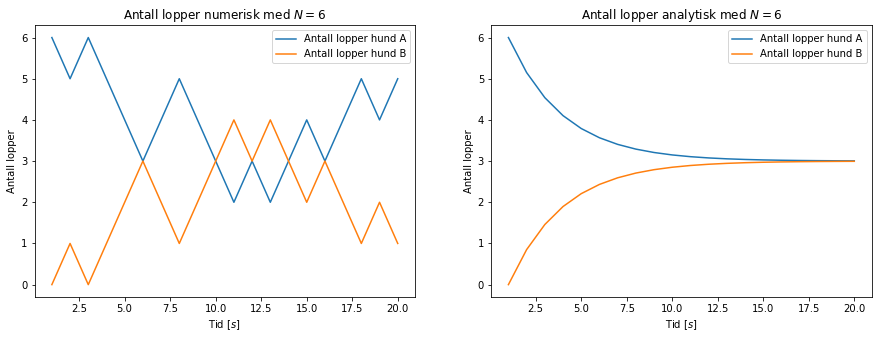

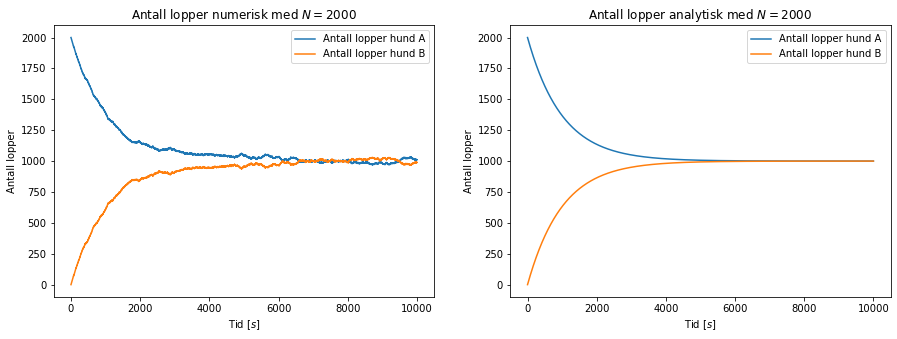

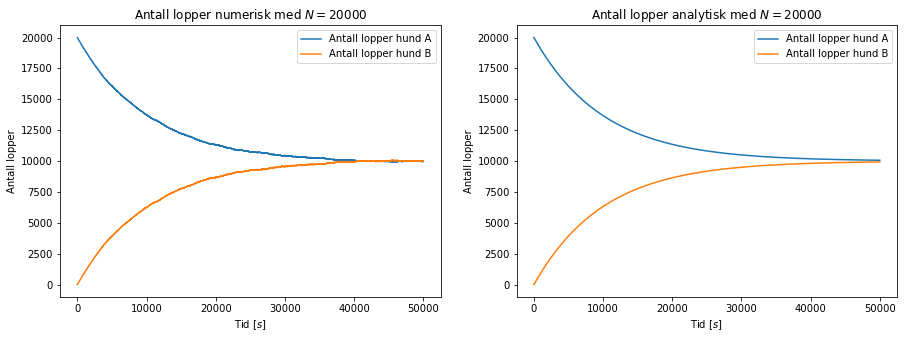

In [12]:
import numpy as np
import matplotlib.pyplot as plt

N_values = [6, 2000, 20000]             # De ulike N-verdiene vi vil plotte for
maxT_values = [20, 10000, 50000]        # hvilken tidsskala vi skal plotte 

for index, N in enumerate(N_values):
    
    t = np.linspace(1, maxT_values[index], maxT_values[index])
    N_A = np.empty(maxT_values[index])
    N_B = np.empty(maxT_values[index])
    N_A[0] = N

    N_A_an = []
    N_B_an = []

    N_A_an.append(N)
    N_B_an.append(0)

    hopper = np.random.randint(0, high=N, size=maxT_values[index] +1)
    loppested = np.full(N, True)                                    # True = hund A, False = hund B

    def N_A_analytisk(t):
        return N / 2 * (1 + np.exp(-2 * 1 / N * t))

    for tid in range(1, maxT_values[index], 1):
        N_A_an.append(N_A_analytisk(tid))
        N_B_an.append(N - N_A_analytisk(tid))

        if loppested[hopper[tid]]:
            loppested[hopper[tid]] = False
            N_A[tid] = N_A[tid - 1] - 1
            N_B[tid] = N_B[tid - 1] + 1
        else:
            loppested[hopper[tid]] = True
            N_A[tid] = N_A[tid - 1] + 1
            N_B[tid] = N_B[tid - 1] - 1

    fig, axarr = plt.subplots(1, 2, figsize=(15, 5))

    axarr[0].set_title(f"Antall lopper numerisk med $N={N}$")
    axarr[0].set_ylabel("Antall lopper")
    axarr[0].set_xlabel("Tid $[s]$")
    axarr[0].plot(t, N_A, label="Antall lopper hund A")
    axarr[0].plot(t, N_B, label="Antall lopper hund B")
    axarr[0].legend()

    axarr[1].set_title(f"Antall lopper analytisk med $N={N}$")
    axarr[1].set_ylabel("Antall lopper")
    axarr[1].set_xlabel("Tid $[s]$")
    axarr[1].plot(t, N_A_an, label="Antall lopper hund A")
    axarr[1].plot(t, N_B_an, label="Antall lopper hund B")
    axarr[1].legend()

plt.show()